In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

data=pd.read_csv('Social_Network_Ads.csv')
data.sample()

,User ID,Gender,Age,EstimatedSalary,Purchased
230,15794253,Female,35,147000,1


<Axes: >

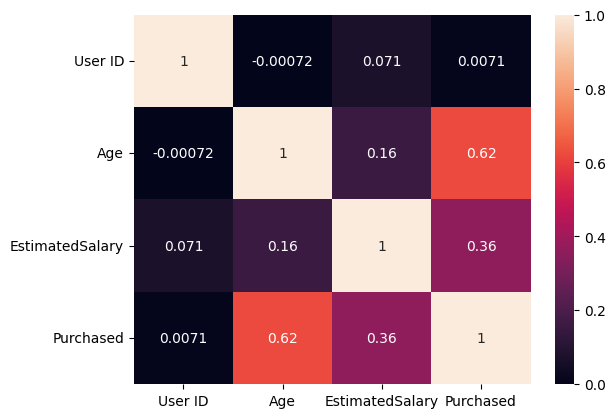

In [58]:
new_data=data.select_dtypes(include='number')
sns.heatmap(new_data.corr(),annot=True)

In [65]:
X=data[['Age','EstimatedSalary']]
y=data['Purchased']

scaler=StandardScaler()
X_trained=scaler.fit_transform(X)
X_train,x_test,y_train,y_test=train_test_split(X_trained,y,test_size=0.2,random_state=42)

In [66]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [67]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [72]:
cm=confusion_matrix(y_test,y_pred)
print(confusion_matrix)
cm

<function confusion_matrix at 0x0000022D4C5884A0>


array([[50,  2],
       [ 9, 19]], dtype=int64)

In [73]:
TP=cm[0,0]
FP=cm[0,1]
FN=cm[1,0]
TN=cm[1,1]
print("TN: ",TN)
print("FN: ",FN)
print("FP: ",FP)
print("TP: ",TP)

TN:  19
FN:  9
FP:  2
TP:  50


In [74]:
accuracy=(TP+TN)/ (TP+FP+FN+TN)
accuracy

0.8625

In [75]:
error_rate=(FP+FN)/ (TP+FP+FN+TN)
error_rate

0.1375

In [76]:
precision=TP/(TP+FP)
precision

0.9615384615384616

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



In [79]:
sns.heatmap(data.corr())

ValueError: could not convert string to float: 'Male'

<Axes: >

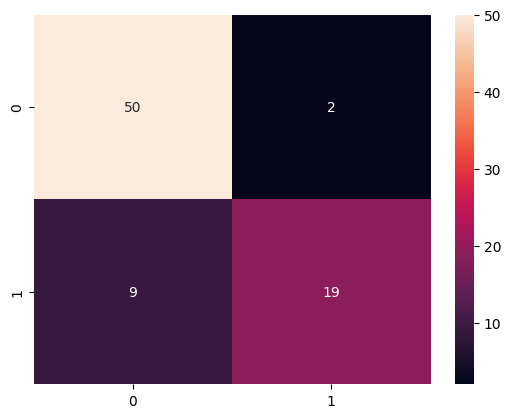

In [81]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)